In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [2]:
businesses = DataFrame.from_csv('yelp_NV_businesses.csv')
reviews = DataFrame.from_csv('yelp_NV_reviews.csv')
users = DataFrame.from_csv('yelp_NV_users.csv')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2802: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


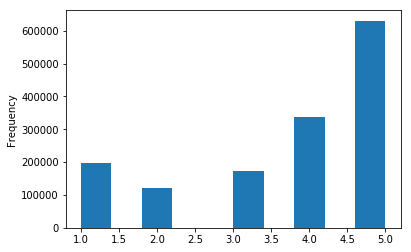

In [12]:
import matplotlib
%matplotlib inline

reviews['stars'].plot(kind='hist', bins=10)

In [17]:
businesses.city.value_counts()

Las Vegas                22941
Henderson                 3791
North Las Vegas           1181
Boulder City               218
Paradise                    25
Nellis Air Force Base       21
Blue Diamond                11
Spring Valley                7
Summerlin                    6
Enterprise                   5
Sloan                        2
Sunrise                      1
Lake Las Vegas               1
Clark county                 1
Centennial Hills             1
Whitney                      1
Green Valley                 1
Name: city, dtype: int64

In [16]:
import re
businesses['city'] = businesses['city'].str.replace('las.*vegas.*', 'Las Vegas', flags=re.IGNORECASE)
businesses['city'] = businesses['city'].str.replace('n.*las.*vegas.*', 'North Las Vegas', flags=re.IGNORECASE)
businesses['city'] = businesses['city'].str.replace('[sw].*las.*vegas.*', 'Las Vegas', flags=re.IGNORECASE)
businesses['city'] = businesses['city'].str.replace('.*summerlin.*', 'Summerlin', flags=re.IGNORECASE)
businesses['city'] = businesses['city'].str.replace('.*nellis.*', 'Nellis Air Force Base', flags=re.IGNORECASE)
businesses['city'] = businesses['city'].str.replace('.*hend.*', 'Henderson', flags=re.IGNORECASE)
businesses['city'] = businesses['city'].str.replace('.*sloan.*', 'Sloan', flags=re.IGNORECASE)
businesses['city'] = businesses['city'].str.replace('.*spring.*', 'Spring Valley', flags=re.IGNORECASE)
businesses['city'] = businesses['city'].str.replace('.*boulder.*', 'Boulder City', flags=re.IGNORECASE)


In [18]:
businesses.to_csv('yelp_NV_businesses.csv', index=False)

In [19]:
reviews.head()

,cool,date,funny,review_id,stars,text,type,useful,user_id
business_id,,,,,,,,,
4uiijOUDzc-DeIb2XcKW_A,0,2009-09-15,0,-K5z7DzXHJgEC1tsTLfFeA,3.0,We came here for dinner to celebrate my friend...,review,2.0,C0jquh-km5UnawqDqSQpBw
4uiijOUDzc-DeIb2XcKW_A,1,2010-11-25,1,2tjghSImOPf4A9L4zhByRQ,3.0,"Ah, Khotan... I knew you when (SIGH) you were ...",review,1.0,cPifBB7Qbjs9PntPGOY9iQ
4uiijOUDzc-DeIb2XcKW_A,0,2011-01-13,0,fCVQlHk6x7-S2FWWMbOWpA,2.0,Khotan sucks as a place to eat. The girls and ...,review,1.0,pgTz-Ds6WvS8qFOsRekG9A
4uiijOUDzc-DeIb2XcKW_A,2,2010-09-06,1,N42b2u6YSL5iEjN6NnrKeQ,4.0,My boyfriend and I decided to go resturant hun...,review,2.0,GDeoUHALgyqK13ewN92Jnw
4uiijOUDzc-DeIb2XcKW_A,1,2010-07-28,0,3r40NTxUZyjPI26ftFaHaw,4.0,***for lounge only****\n\nMaybe I like this pl...,review,0.0,d1sLYlfSzHo6WCpfe-j7zg


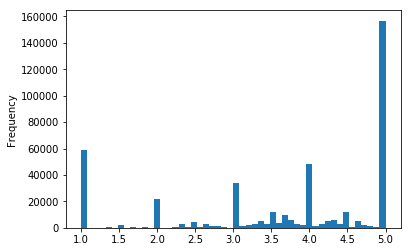

In [23]:
reviews.groupby('user_id')['stars'].mean().plot(kind='hist', bins=50)

In [58]:
users = users.set_index('user_id')

In [61]:
users['avg_rating'] = reviews.groupby('user_id')['stars'].mean()

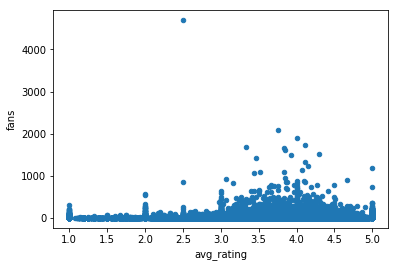

In [63]:
users.plot(kind='scatter', x='avg_rating', y='fans')

In [76]:
cols = users.dtypes[users.dtypes != 'object'].index.values
cols

array(['compliment_cool', 'compliment_cute', 'compliment_funny',
       'compliment_hot', 'compliment_list', 'compliment_more',
       'compliment_note', 'compliment_photos', 'compliment_plain',
       'compliment_profile', 'compliment_writer', 'cool', 'fans', 'funny',
       'review_count', 'useful', 'avg_rating'], dtype=object)

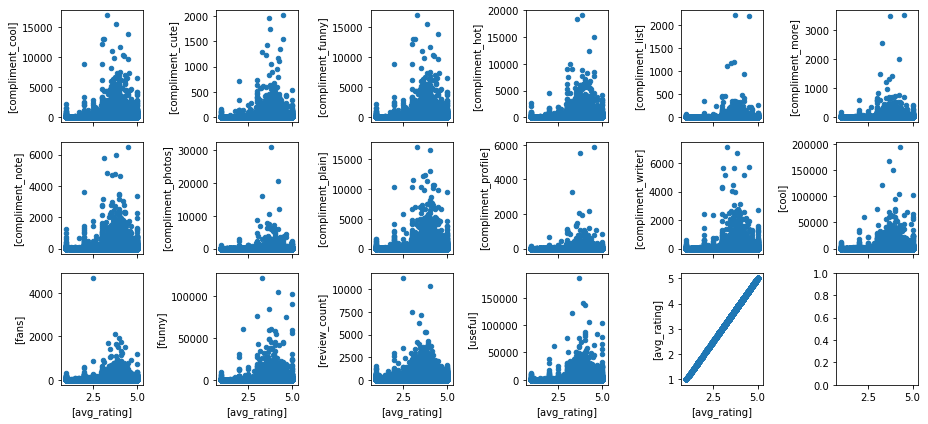

In [89]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,6, sharex=True, figsize=(13,6))
# len(cols)
# axes
for i, col in enumerate(cols):
    r = ((i)//6)
    c = ((i)%6)
    users.plot(x=['avg_rating'], y=[col], kind="scatter", ax=axes[r][c])

fig.tight_layout()
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a30b7dd8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1ffd8c358>]], dtype=object)

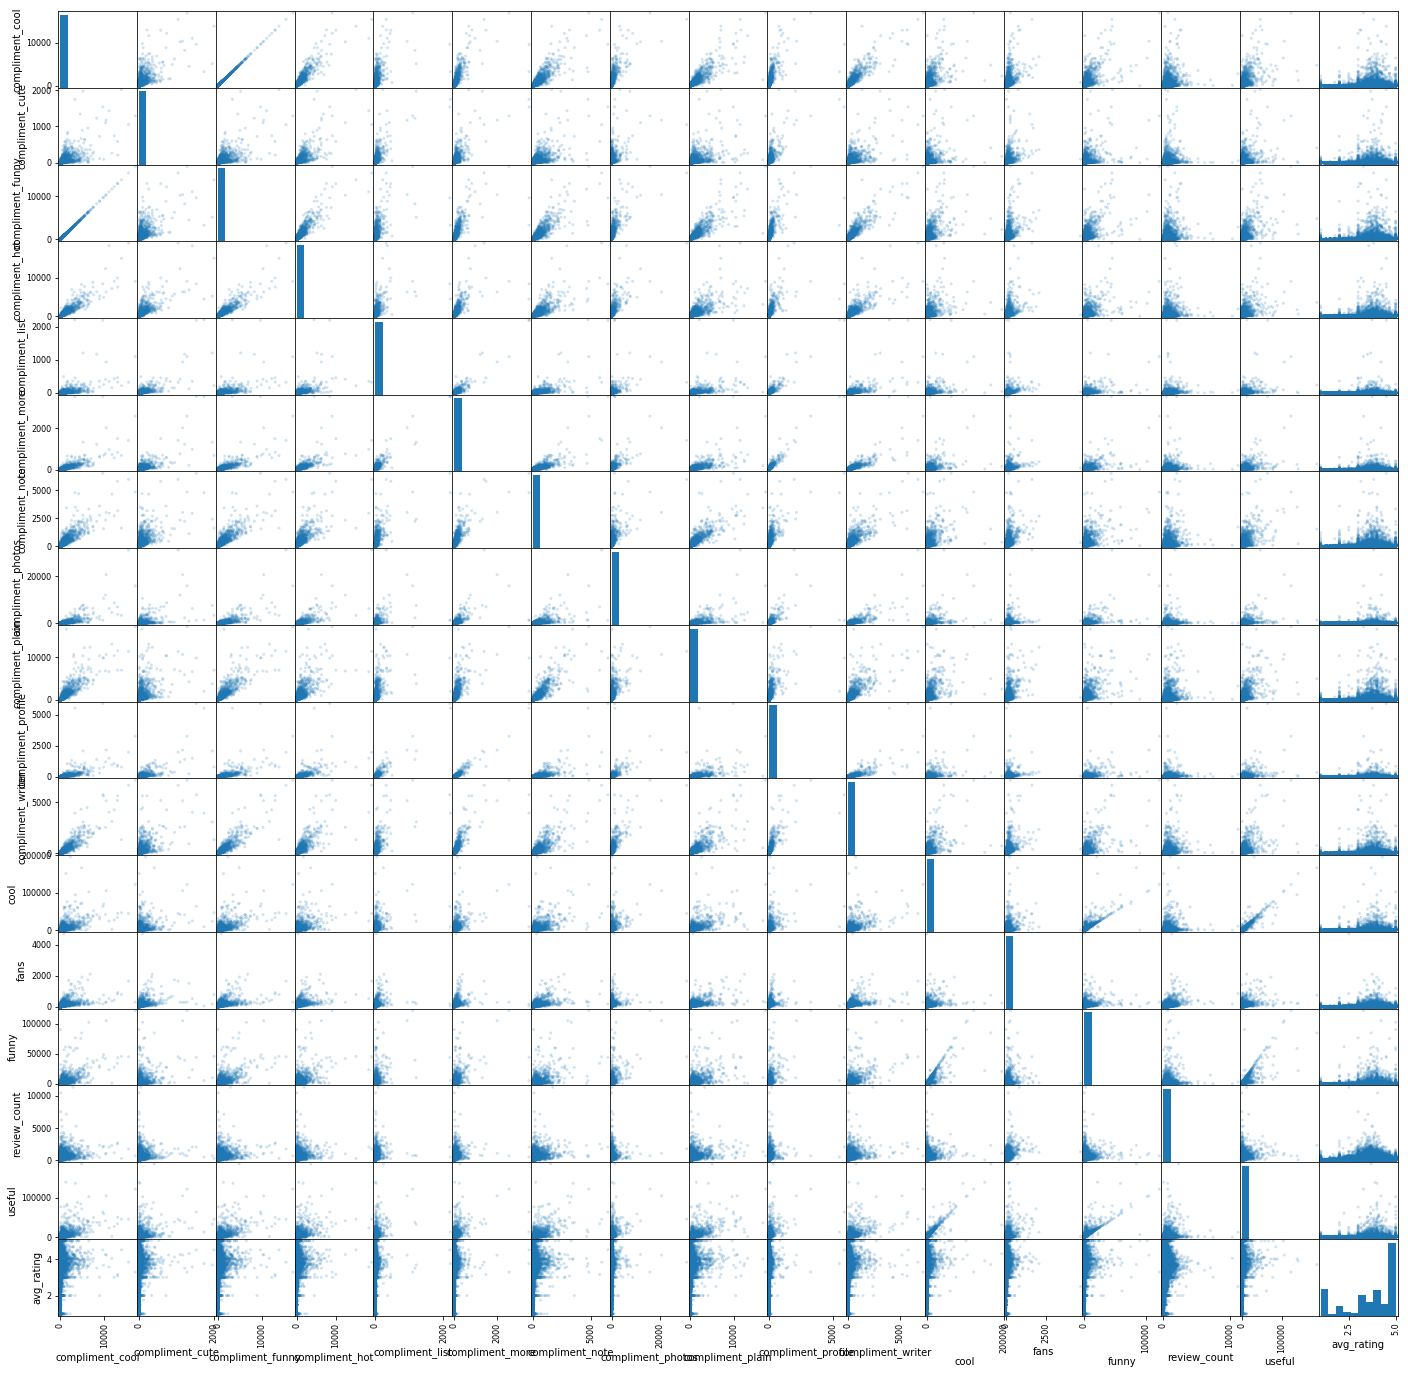

In [93]:
from pandas.plotting import scatter_matrix

scatter_matrix(users, alpha=0.2, figsize=(24, 24))